# **Classification**
---
* Clasificación binaria
* Clasificación multiclase


**Algoritmos de clasificación**
* K-nearest Neighbor
* Naive Bayes
* Logistic Regression
* Linear Discriminant analysis
* Suport Vector Machine
* Decision Trees & Random Forest
* Neural Networks

**Métricas de evaluación**
* Accuracy
* Precision
* Recall
* F1-Score
* Matriz de confusión 

![](assets/metrics.png)

## **K-Nearest neighbors**
---
Método para clasificar cases basados en su similitud con otros casos.

Asigna a una nueva muestra la categoría o valor promedio más común entre sus k vecinos más cercanos. Aquí te dejo un resumen de los aspectos más importantes.

1. **Número de Vecinos (k)**: Es el parámetro principal del modelo. Afecta directamente la clasificación o predicción, ya que determina cuántos vecinos cercanos se considerarán. Un valor muy pequeño puede hacer que el modelo sea sensible al ruido, mientras que un valor muy grande puede hacer que se considere demasiada información irrelevante.

2. **Métrica de Distancia**: Define cómo se mide la "cercanía" entre puntos. Algunas métricas comunes incluyen:
    * Distancia euclidiana: apropiada para características numéricas.
    * Distancia de Manhattan: útil cuando las diferencias en dimensiones individuales son importantes.
    * Distancia de Minkowski: una generalización de las distancias euclidiana y de Manhattan.

3. **Ponderación de Vecinos**: Determina si todos los vecinos contribuyen por igual a la clasificación/regresión o si los vecinos más cercanos tienen más peso. Las opciones comunes incluyen:
    * Peso uniforme: todos los vecinos contribuyen igualmente.
    * Peso según distancia: los vecinos más cercanos tienen más influencia.

4. **Algoritmo para Búsqueda de Vecinos**: Los métodos para encontrar los vecinos más cercanos incluyen:
    * Fuerza bruta: compara todos los pares de puntos, lo que puede ser muy lento para grandes conjuntos de datos.
    * KD-Tree: efectivo para dimensiones bajas a moderadas.
    * Ball Tree: mejor para dimensiones moderadas a altas.

5. **Normalización de Características**: Dado que KNN usa distancias, diferencias en la escala de las características pueden llevar a sesgos. Normalizar los datos (p. ej., escala unitaria) a menudo es crucial.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

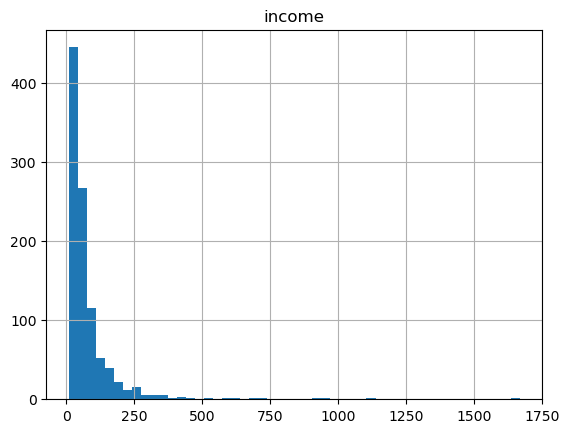

In [11]:
df.hist(column="income", bins=50)

### **Preprocessing Data**

In [21]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
y = df["custcat"]

X[:5], y[:5]

(   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
 0       2      13   44        1        9    64.0   4       5     0.0       0   
 1       3      11   33        1        7   136.0   5       5     0.0       0   
 2       3      68   52        1       24   116.0   1      29     0.0       1   
 3       2      33   33        0       12    33.0   2       0     0.0       1   
 4       2      23   30        1        9    30.0   1       2     0.0       0   
 
    reside  
 0       2  
 1       6  
 2       2  
 3       1  
 4       4  ,
 0    1
 1    4
 2    3
 3    1
 4    3
 Name: custcat, dtype: int64)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
type(X)

numpy.ndarray

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape

((750, 11), (250, 11))

### **Classification**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

knc

KNeighborsClassifier(n_neighbors=4)

In [24]:
yhat = knc.predict(X_test)
yhat[:5]

array([3, 2, 1, 3, 1], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

knc.score(X_train, y_train), knc.score(X_test, y_test)

(0.56, 0.296)

In [26]:
knc = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

In [27]:
knc.score(X_train, y_train), knc.score(X_test, y_test)

(0.508, 0.348)

In [31]:
ks = np.arange(1,11)

accs = []
for k in ks:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score = knc.score(X_test, y_test)
    accs.append(score)


Text(0, 0.5, 'Accuracy')

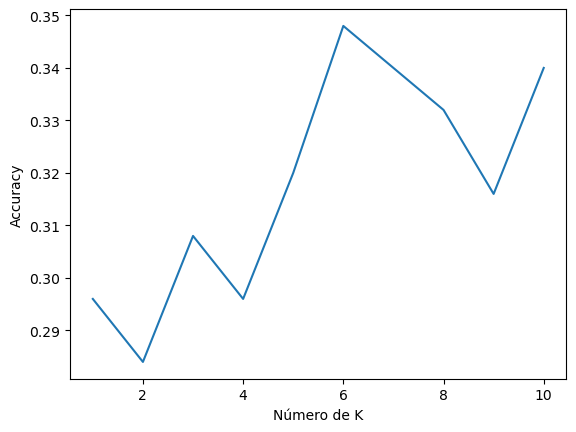

In [34]:
plt.plot(ks, accs)
plt.xlabel("Número de K")
plt.ylabel("Accuracy")

In [37]:
print( "The best accuracy was with", np.array(accs).max(), "with k=", np.array(accs).argmax()+1) 

The best accuracy was with 0.348 with k= 6
